# Commercial Insights for a Pharmaceutical Marketplace

## Project Objective
This project simulates the role of a Commercial Insights & Data Associate at a healthcare
marketplace serving low- and middle-income countries (LMICs).

The objective is to analyze buyer behavior, supplier pricing dynamics and marketplace
health metrics using synthetic pharmaceutical transaction data and translate insights
into commercial recommendations.

## Tools
- Python (pandas, numpy)
- SQL-style analysis via pandas
- Data visualization (matplotlib, plotly)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

plt.rcParams["figure.figsize"] = (10,6)


In [2]:
np.random.seed(42)

n_transactions = 1500

data = pd.DataFrame({
    "transaction_id": range(1, n_transactions + 1),
    "buyer_id": np.random.randint(1, 101, n_transactions),
    "supplier_id": np.random.randint(1, 31, n_transactions),
    "drug_name": np.random.choice(
        ["Amoxicillin", "Paracetamol", "Insulin", "Metformin", "Ceftriaxone"],
        n_transactions
    ),
    "therapeutic_class": np.random.choice(
        ["Antibiotics", "Analgesics", "Diabetes"],
        n_transactions
    ),
    "quantity": np.random.randint(1, 500, n_transactions),
    "unit_price": np.round(np.random.uniform(0.5, 25, n_transactions), 2),
    "country": np.random.choice(["Kenya", "Uganda", "Tanzania"], n_transactions),
    "transaction_date": pd.to_datetime("2024-01-01") +
                        pd.to_timedelta(np.random.randint(0, 365, n_transactions), unit="D")
})

data.head()


,transaction_id,buyer_id,supplier_id,drug_name,therapeutic_class,quantity,unit_price,country,transaction_date
0,1,52,17,Ceftriaxone,Analgesics,372,10.56,Uganda,2024-04-23
1,2,93,27,Ceftriaxone,Diabetes,256,20.53,Tanzania,2024-12-04
2,3,15,7,Metformin,Analgesics,215,22.43,Uganda,2024-02-25
3,4,72,8,Amoxicillin,Diabetes,30,21.40,Uganda,2024-12-24
4,5,61,3,Insulin,Analgesics,281,17.00,Uganda,2024-05-17


In [3]:
data.to_csv("synthetic_pharma_transactions.csv", index=False)


In [4]:
conn = sqlite3.connect(":memory:")
data.to_sql("transactions", conn, index=False, if_exists="replace")


1500

In [5]:
buyer_demand = pd.read_sql("""
SELECT
    buyer_id,
    COUNT(transaction_id) AS total_orders,
    SUM(quantity * unit_price) AS total_spend
FROM transactions
GROUP BY buyer_id
ORDER BY total_spend DESC
LIMIT 10
""", conn)

buyer_demand


,buyer_id,total_orders,total_spend
0,90,25,100984.47
1,99,20,95877.01
2,51,25,91757.39
3,2,20,91370.60
4,62,27,88546.10
5,1,24,85376.08
6,17,20,83990.02
7,32,17,76021.14
8,96,16,74775.16
9,39,14,73799.95


### Insight
A small number of buyers account for a disproportionate share of total marketplace spend,
suggesting opportunities for targeted account management and pricing strategies.


In [7]:
supplier_perf = pd.read_sql("""
SELECT
    supplier_id,
    AVG(unit_price) AS avg_price,
    SUM(quantity) AS total_volume
FROM transactions
GROUP BY supplier_id
ORDER BY total_volume DESC
""", conn)

supplier_perf.head()


,supplier_id,avg_price,total_volume
0,18,13.508966,16493
1,13,13.249464,15638
2,2,13.917833,15316
3,28,12.692745,14691
4,25,10.966415,14327


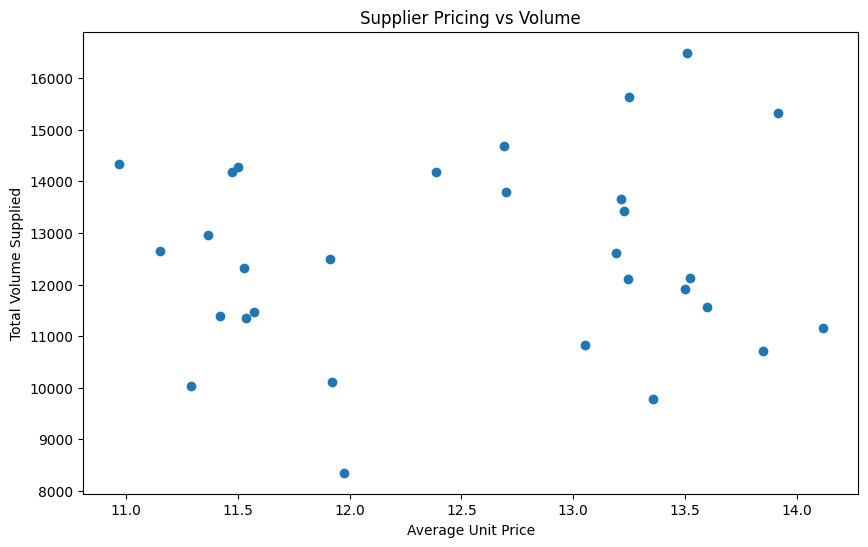

In [8]:
plt.scatter(supplier_perf["avg_price"], supplier_perf["total_volume"])
plt.xlabel("Average Unit Price")
plt.ylabel("Total Volume Supplied")
plt.title("Supplier Pricing vs Volume")
plt.show()


Suppliers with moderate pricing achieve higher volume, indicating price sensitivity and
potential demand elasticity in essential medicines.


In [9]:
market_metrics = {
    "Average Order Value": (data["quantity"] * data["unit_price"]).mean(),
    "Total Transactions": data.shape[0],
    "Unique Buyers": data["buyer_id"].nunique(),
    "Unique Suppliers": data["supplier_id"].nunique()
}

market_metrics


{'Average Order Value': np.float64(3141.4028400000007),
 'Total Transactions': 1500,
 'Unique Buyers': 100,
 'Unique Suppliers': 30}

## Commercial Recommendations

1. Prioritize high-spend buyers with tailored pricing and availability guarantees.
2. Encourage competitive pricing among suppliers to reduce price dispersion.
3. Focus supplier onboarding in high-demand therapeutic classes.
4. Use marketplace metrics to monitor concentration risk and resilience.
